In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from statistics import mean
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.linalg import pinv2, inv
import time
import sys

## Upload data

In [2]:
df = pd.read_csv (r'pd_speech_features.csv',header=1 )
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [3]:
df.shape

(756, 755)

## Helper function to print confusion matrix

In [4]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
          for j in range (cm.shape[1]):
                 plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Seperating labels

In [5]:
X = df.iloc[:, 1:-1].values
y = df["class"].values

In [6]:
X.shape

(756, 753)

In [7]:
y.shape

(756,)

## Data standardization

In [8]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

# MLP
5-fold cross validation

In [25]:
kf = KFold(n_splits=5)

accuracy_dt = []
f1_dt = []
precision_dt = []
recall_dt = []
confusionMatrix_dt = []

test = []
for train, test in kf.split(standardized_data):
    X_train, X_test = standardized_data[train], standardized_data[test]
    y_train, y_test = y[train], y[test]

    model = Sequential()
    model.add(Dense(64, input_shape=(753,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=5, batch_size=10)



    accuracy_dt.append(accuracy_score(y_test, np.round_(model.predict(X_test))))
    f1_dt.append(f1_score(y_test, np.round_(model.predict(X_test))))
    precision_dt.append(precision_score(y_test, np.round_(model.predict(X_test))))
    recall_dt.append(recall_score(y_test, np.round_(model.predict(X_test))))
    confusionMatrix_dt.append(confusion_matrix(y_test, np.round_(model.predict(X_test))))

Epoch 1/5
61/61 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7798
Epoch 2/5
61/61 [==============================] - 0s 6ms/step - loss: 0.2487 - accuracy: 0.8907
Epoch 3/5
61/61 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.9387
Epoch 4/5
61/61 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9785
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5
61/61 [==============================] - 1s 2ms/step - loss: 0.4838 - accuracy: 0.7636
Epoch 2/5
61/61 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9058
Epoch 3/5
61/61 [==============================] - 0s 3ms/step - loss: 0.1524 - accuracy: 0.9388
Epoch 4/5
61/61 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9802
Epoch 5/5
5/5 [==============================] - 0s 2ms/step
Epoch 1/5
61/61 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7669
Epoch

## Reporting Confusion Matrix, Accuracy, Precision, Recall and f- measure

accuracy --> 0.8320407807598467
f1 score --> 0.889130282058944
precision --> 0.8608066873304187
recall --> 0.920590653250234
confusion matrix:


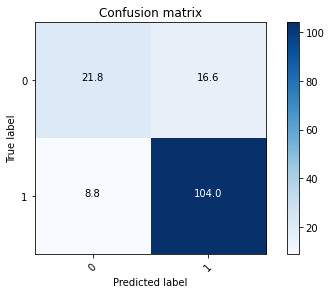

In [26]:
print(f"accuracy --> {mean(accuracy_dt)}")
print(f"f1 score --> {mean(f1_dt)}")
print(f"precision --> {mean(precision_dt)}")
print(f"recall --> {mean(recall_dt)}")
print(f"confusion matrix:")
targets = ['0','1']
plot_confusion_matrix(np.mean(confusionMatrix_dt, axis = 0), targets)

## AutoEncoder

In [11]:
input = keras.Input(shape=(753,))
encoded1 = layers.Dense(512, activation='relu')(input)
encoded2 = layers.Dense(256, activation='relu')(encoded1)
encoded3 = layers.Dense(128, activation='relu')(encoded2)
decoded1 = layers.Dense(256, activation='relu')(encoded3)
decoded2 = layers.Dense(512, activation='relu')(decoded1)
decoded3 = layers.Dense(753, activation='sigmoid')(decoded2)
autoencoder = keras.Model(input, decoded3)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(standardized_data ,standardized_data , epochs=300, shuffle=True)

Epoch 1/300
24/24 [==============================] - 1s 12ms/step - loss: 1.0447
Epoch 2/300
24/24 [==============================] - 0s 12ms/step - loss: 0.9553
Epoch 3/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8990
Epoch 4/300
24/24 [==============================] - 0s 13ms/step - loss: 0.8731
Epoch 5/300
24/24 [==============================] - 0s 12ms/step - loss: 0.8554
Epoch 6/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8442
Epoch 7/300
24/24 [==============================] - 0s 12ms/step - loss: 0.8316
Epoch 8/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8193
Epoch 9/300
24/24 [==============================] - 0s 12ms/step - loss: 0.8100
Epoch 10/300
24/24 [==============================] - 0s 11ms/step - loss: 0.8038
Epoch 11/300
24/24 [==============================] - 0s 13ms/step - loss: 0.7982
Epoch 12/300
24/24 [==============================] - 0s 11ms/step - loss: 0.7944
Epoch 13/300
24/24 [=====

In [12]:
encoder = keras.Model(input, encoded3)
encoded_X = encoder.predict(standardized_data)

24/24 [==============================] - 0s 4ms/step


In [13]:
encoded_X.shape

(756, 128)

## Using AutoEncoder
5-fold cross validation

In [27]:
kf = KFold(n_splits=5)

accuracy_dt_autoencoder = []
f1_dt_autoencoder = []
precision_dt_autoencoder = []
recall_dt_autoencoder = []
confusionMatrix_dt_autoencoder = []

test = []
for train, test in kf.split(encoded_X):
    X_train, X_test = encoded_X[train], encoded_X[test]
    y_train, y_test = y[train], y[test]
    model2 = Sequential()
    model2.add(Dense(64, input_shape=(128,), activation='relu'))
    model2.add(Dense(32, activation='relu'))    
    model2.add(Dense(1, activation='sigmoid'))
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model2.fit(X_train, y_train, epochs=25)

    accuracy_dt_autoencoder.append(accuracy_score(y_test, np.round_(model2.predict(X_test))))
    f1_dt_autoencoder.append(f1_score(y_test, np.round_(model2.predict(X_test))))
    precision_dt_autoencoder.append(precision_score(y_test, np.round_(model2.predict(X_test))))
    recall_dt_autoencoder.append(recall_score(y_test, np.round_(model2.predict(X_test))))
    confusionMatrix_dt_autoencoder.append(confusion_matrix(y_test, np.round_(model2.predict(X_test))))

Epoch 1/25
19/19 [==============================] - 1s 2ms/step - loss: 0.7770 - accuracy: 0.7053
Epoch 2/25
19/19 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8195
Epoch 3/25
19/19 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8692
Epoch 4/25
19/19 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.8974
Epoch 5/25
19/19 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9189
Epoch 6/25
19/19 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9387
Epoch 7/25
19/19 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9503
Epoch 8/25
19/19 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9719
Epoch 9/25
19/19 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9785
Epoch 10/25
19/19 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9884
Epoch 11/25
19/19 [

## Reporting Confusion Matrix, Accuracy, Precision, Recall and f- measure

accuracy --> 0.8134454513767864
f1 score --> 0.8780443180139992
precision --> 0.8486833594048304
recall --> 0.9109801904630032
confusion matrix:


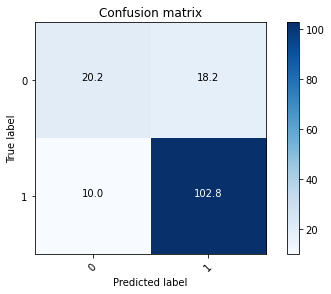

In [28]:
print(f"accuracy --> {mean(accuracy_dt_autoencoder)}")
print(f"f1 score --> {mean(f1_dt_autoencoder)}")
print(f"precision --> {mean(precision_dt_autoencoder)}")
print(f"recall --> {mean(recall_dt_autoencoder)}")
print(f"confusion matrix:")
plot_confusion_matrix(np.mean(confusionMatrix_dt_autoencoder, axis = 0), targets)

In [16]:
Xnew = X.astype(np.float32) 
ynew=  np.asarray(y).astype('float32').reshape((-1,1))

In [17]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
ynew = encoder.fit_transform(ynew)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, ynew, test_size=0.25)

In [19]:
import numpy as np
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/')


In [20]:
import numpy as np
from scipy.linalg import pinv2, inv
import time

class ELM():
    def __init__(self, hidden_units, activation_function,  x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]     
        self.beta = np.zeros((self.hidden_units, self.class_num))   
        self.elm_type = elm_type
        self.one_hot = one_hot

        # if classification problem and one_hot == True
        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1/(1 + np.exp(- self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH))/(np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''
    def fit(self, algorithm):
        self.time1 = time.perf_counter()   # compute running time
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y
        # no regularization
        if algorithm == 'no_re':
            self.beta = np.dot(pinv2(self.H.T), self.y_temp)
        # faster algorithm 1
        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.perf_counter()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        if self.elm_type == 'clf':
            self.result = np.exp(self.result)/np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''
    def predict(self, x):
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''
    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct/y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])

        return self.test_score


# Using ELM
5-fold cross validation

In [39]:
kf = KFold(n_splits=5)

accuracy_dt_elm = []
f1_dt_elm = []
precision_dt_elm = []
recall_dt_elm = []
confusionMatrix_dt_elm = []

test = []
for train, test in kf.split(standardized_data):
    X_train, X_test = standardized_data[train], standardized_data[test]
    y_train, y_test = ynew[train], ynew[test]
    
    temp = []
    for i in range(len(y_train)):
        if y_train[i][0] == 1:
            temp.append(0)
        else:
            temp.append(1)
    y_train = np.array(temp)

    temp = []
    for i in range(len(y_test)):
        if y_test[i][0] == 1:
            temp.append(0)
        else:
            temp.append(1)
    y_test = np.array(temp)

    # built model and train
    model = ELM(hidden_units=32, activation_function='relu', random_type='normal', x=X_train, y=y_train, C=0.1, elm_type='clf')
    beta, train_accuracy, running_time = model.fit('solution2')

    input_dim = X.shape[1] # number of features

    model.fit('clf')

    accuracy_dt_elm.append(accuracy_score(y_test, np.round_(model.predict(X_test))))
    f1_dt_elm.append(f1_score(y_test, np.round_(model.predict(X_test))))
    precision_dt_elm.append(precision_score(y_test, np.round_(model.predict(X_test))))
    recall_dt_elm.append(recall_score(y_test, np.round_(model.predict(X_test))))
    confusionMatrix_dt_elm.append(confusion_matrix(y_test, np.round_(model.predict(X_test))))

## Reporting Confusion Matrix, Accuracy, Precision, Recall and f- measure

accuracy --> 0.7764639247124434
f1 score --> 0.8539320884711862
precision --> 0.8262996939635417
recall --> 0.8845408851430643
confusion matrix:


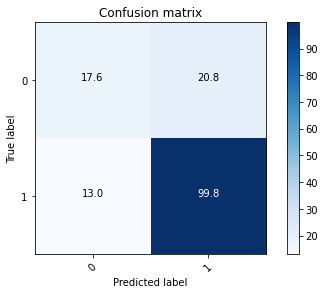

In [40]:
print(f"accuracy --> {mean(accuracy_dt_elm)}")
print(f"f1 score --> {mean(f1_dt_elm)}")
print(f"precision --> {mean(precision_dt_elm)}")
print(f"recall --> {mean(recall_dt_elm)}")
print(f"confusion matrix:")
plot_confusion_matrix(np.mean(confusionMatrix_dt_elm, axis = 0), targets)